In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tf.enable_eager_execution()
tf.executing_eagerly()
L = tf.keras.layers
tfe = tf.contrib.eager

In [2]:
x_train_p = np.random.randn(20, 2) + 0.9
x_train_n = np.random.randn(20, 2) - 0.9

x_train = np.vstack([x_train_p, x_train_n])
y_train = np.array([1] * 20 + [0] * 20).reshape(-1, 1)


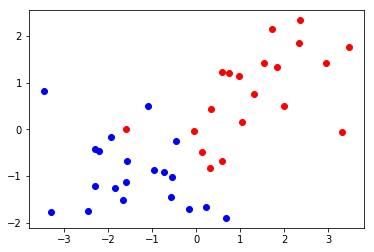

In [3]:
plt.plot(x_train_p[:, 0], x_train_p[:, 1], "ro")
plt.plot(x_train_n[:, 0], x_train_n[:, 1], "bo")

In [4]:
# convert to tensor
x_train_ = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train_ = tf.convert_to_tensor(y_train, dtype=tf.float32)

In [5]:
model = L.Dense(1, activation="sigmoid")

def loss_fn(model, x, y):
    predict_y = model(x)
    return tf.keras.losses.binary_crossentropy(y, predict_y)

def accuracy_fn(model, x, y):
    predict_y = model(x)
    return tf.keras.metrics.binary_crossentropy(y, predict_y)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)

[-3.5, 3.5, -3.5, 3.5]

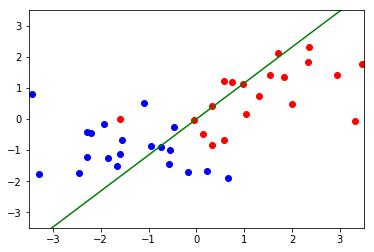

In [6]:
model(x_train_)
coeffs = model.weights[0].numpy()
bias = model.weights[1].numpy()


plt.plot(x_train_p[:, 0], x_train_p[:, 1], 'ro')
plt.plot(x_train_n[:, 0], x_train_n[:, 1], 'bo')

plot_x = np.array([min(x_train[:,0])-0.5, max(x_train[:,0])+0.5])
plot_y = - (bias + coeffs[0]*plot_x) / coeffs[1]
plt.plot(plot_x, plot_y, 'g')
plt.axis([-3.5, 3.5, -3.5, 3.5])

In [ ]:
for epoch in range(10000):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, x_train_, y_train_)
    grads = tape.gradient(loss, model.variables)
    
    accuracy = accuracy_fn(model=model, x=x_train_, y=y_train_)
    
    if (epoch+1) % 5 == 0:
        print(
            "loss: {:0.3f}, acc: {}".format(
                tf.reduce_sum(loss).numpy(),
                
            )
        )